# Decision Trees
### This notebook follows the lab on decision trees from chapter 8 of the book Introduction to Statistical Learning.
## 1. Fitting Classification Trees
### We start by analysing the $\texttt{Carseats}$ data set using classification trees.

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# import and prepare the data set
Carseats = pd.read_csv('Carseats.csv', header=0)
print(Carseats.head())
print("Data set shape:", Carseats.shape)

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
Data set shape: (400, 11)


### We want to fit a classification tree to predict whether the sales for a given car seat will be low or high. Hence, we need to transform the quantitative response variable 'Sales' into a categorical one.

In [3]:
Carseats['High'] = Carseats.Sales.map(lambda x: 'YES' if x>8 else 'NO')
Carseats.ShelveLoc = pd.factorize(Carseats.ShelveLoc)[0]
Carseats.Urban = Carseats.Urban.map({'No':0, 'Yes':1})
Carseats.US = Carseats.US.map({'No':0, 'Yes':1})
print(Carseats.head())
print(Carseats.describe())
print(Carseats.info())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US High  
0         17      1   1  YES  
1         10      1   1  YES  
2         12      1   1  YES  
3         14      1   1   NO  
4         13      1   0   NO  
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10

In [4]:
# split data set into training and testing subsets
X = Carseats.drop(['Sales', 'High'], axis=1)
y = Carseats.High
train_size = 200 # split 50-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=X.shape[0] - train_size, random_state=0)

### When fitting a classification tree we must decide which cost function to use:
- ### Gini index, defined as $$G = \sum_{k=1}^K\hat{p}_{mk}(1 - \hat{p}_{mk}),$$ where $\hat{p}_{mk}$ is the proportion on of training observations from class $k$ which are part of the $m^\text{th}$ region of the input space, i.e., the $m^\text{th}$ node, and $K$ is the total number of classes. Effectively, the Gini index is a measure of the total variance across all classes in the $m^\text{th}$ node, and is low when the $m^\text{th}$ node acts as a good classifier, i.e., a large proportion of the training samples are predicted to be from a single class.
- ### Entropy, defined as $$D = -\sum_{k=1}^K\hat{p}_{mk}\log(\hat{p}_{mk}).$$ We see that entropy is minimised when the $m^\text{th}$ node acts as a good classifier, i.e., a large proportion of the training samples are predicted to be from a single class.

### Here we will use the Gini index as our cost function. Additionally, we set stopping parameters for the fit, namely a maximum tree depth and a minimum number of samples a leaf may contain.

In [13]:
cost_function = 'gini'
max_depth = 6
min_samples_leaf = 4
clf_tree_gini = DecisionTreeClassifier(criterion=cost_function, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100)
clf_tree_gini.fit(X_train, y_train)
print(clf_tree_gini.score(X_train, y_train))

0.9


### The most useful properties of decision trees are that they can be interpreted visually and hence inference about the data set can be achieved.

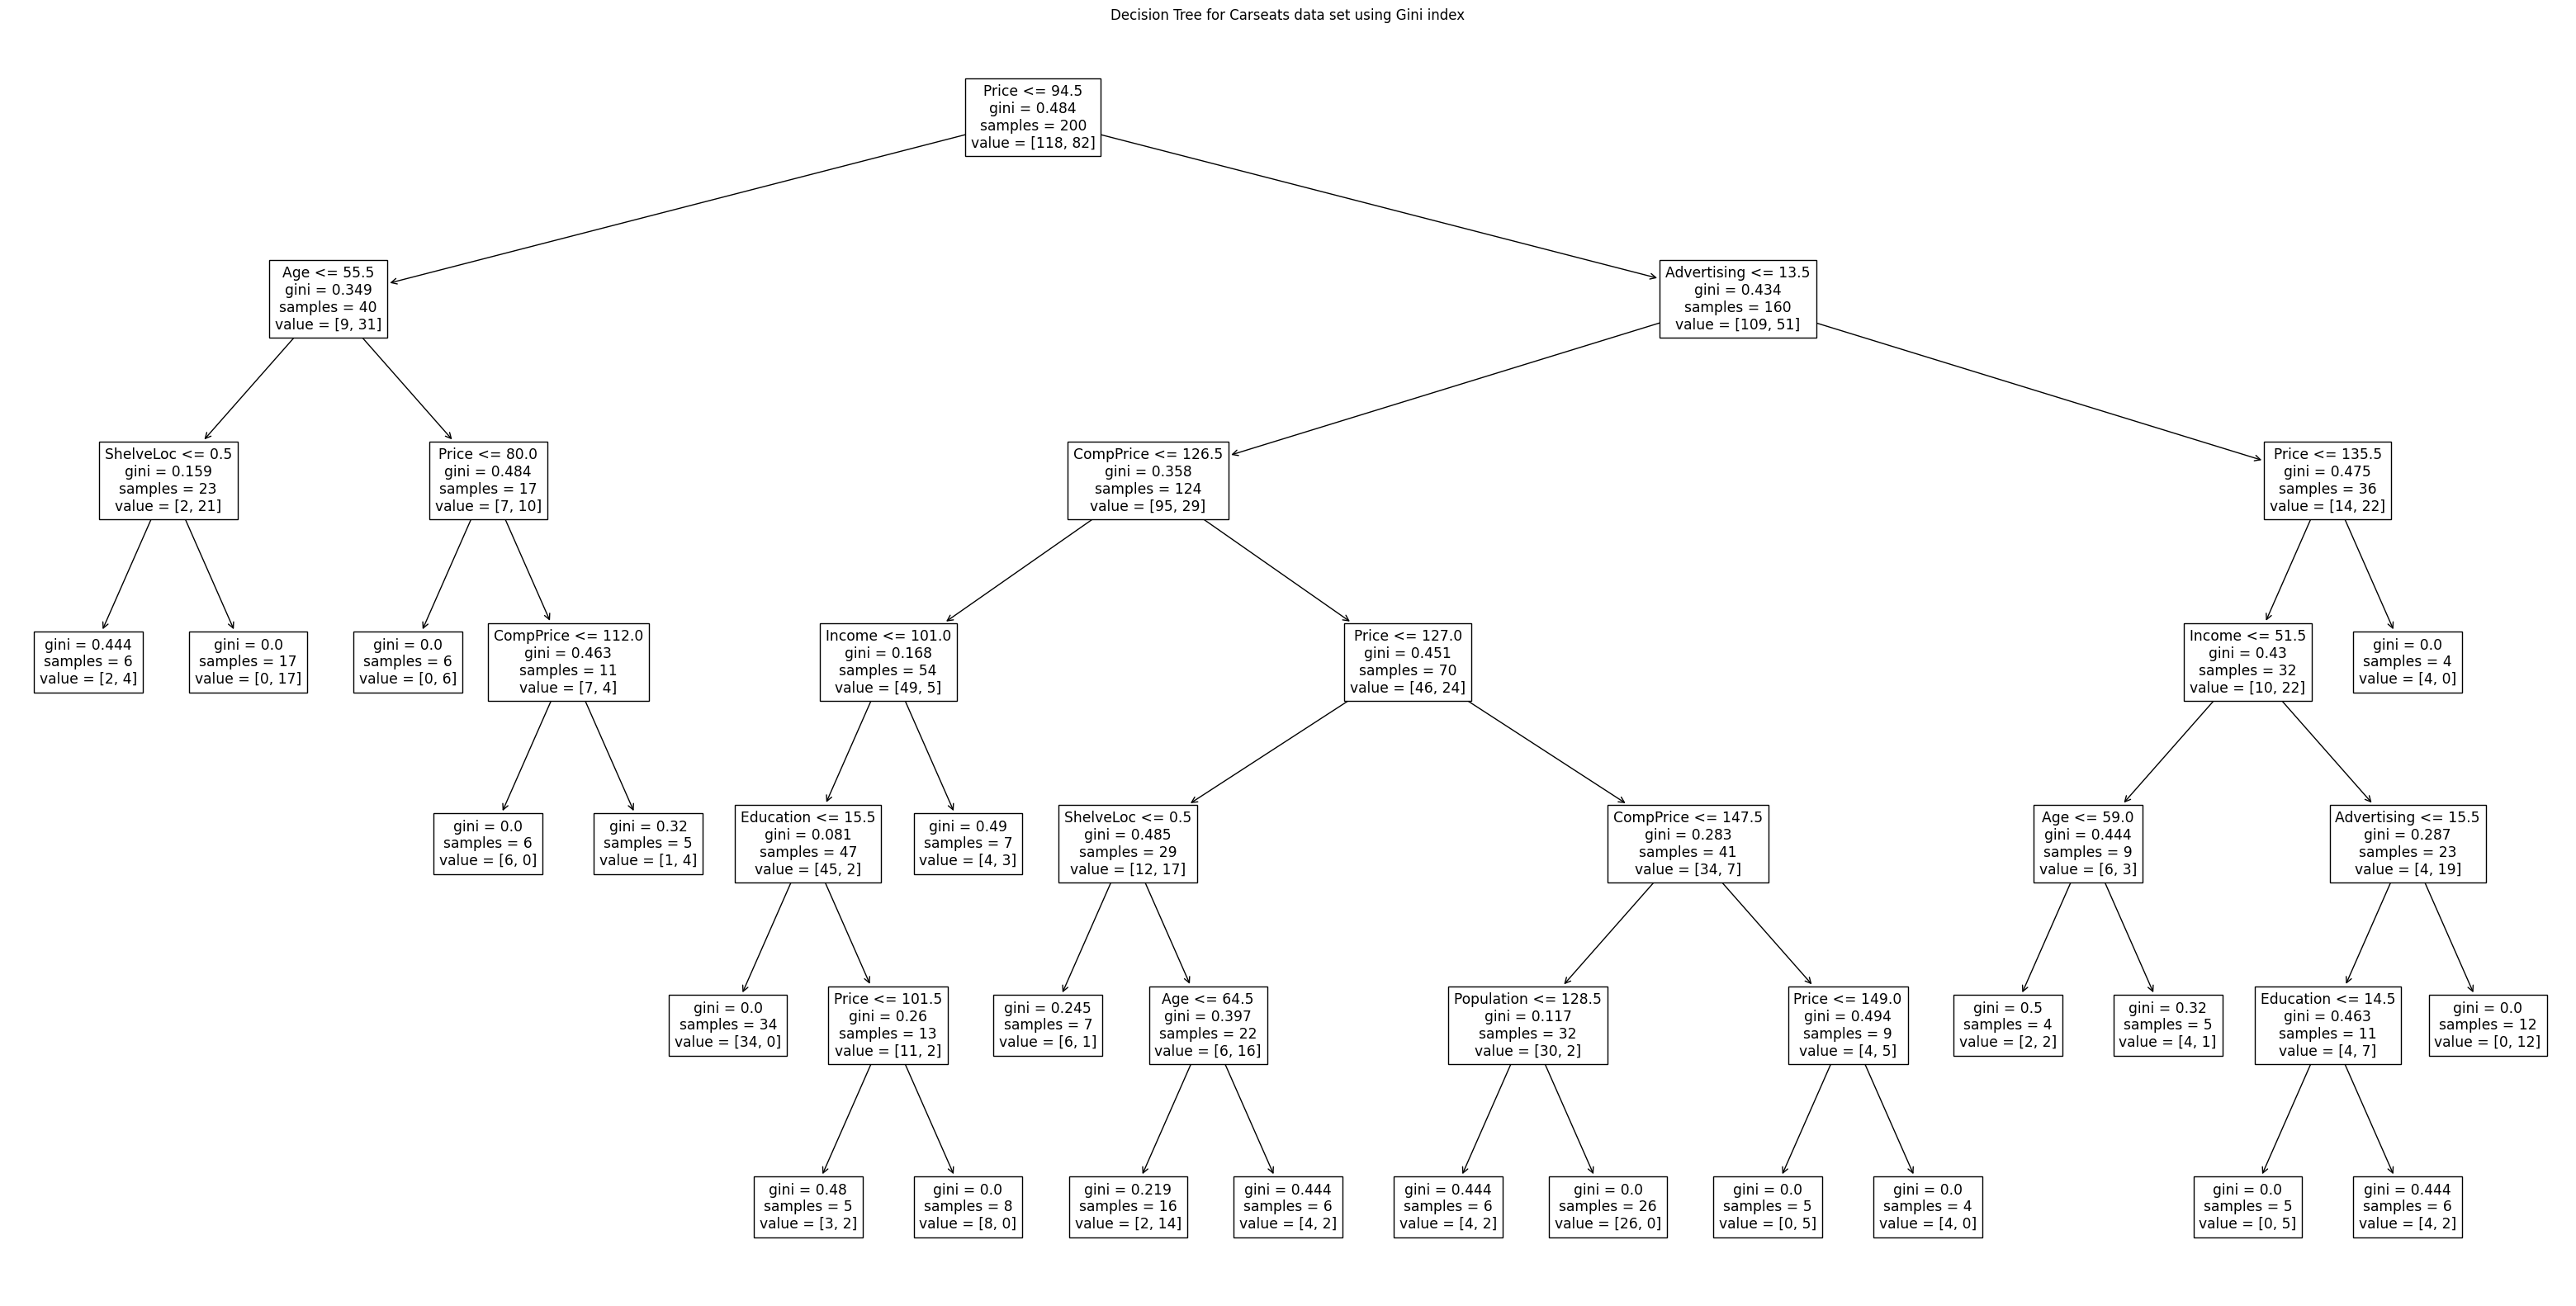

In [14]:
plt.figure(figsize=(40, 20))
plot_tree(clf_tree_gini, feature_names=X_train.columns)
plt.title("Decision Tree for Carseats data set using Gini index")
plt.show()

In [15]:
# consider the same decision tree but with the entropy cost function
cost_function = 'entropy'
clf_tree_entropy = DecisionTreeClassifier(criterion=cost_function, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100)
clf_tree_entropy.fit(X_train, y_train)
print(clf_tree_entropy.score(X_train, y_train))

0.865


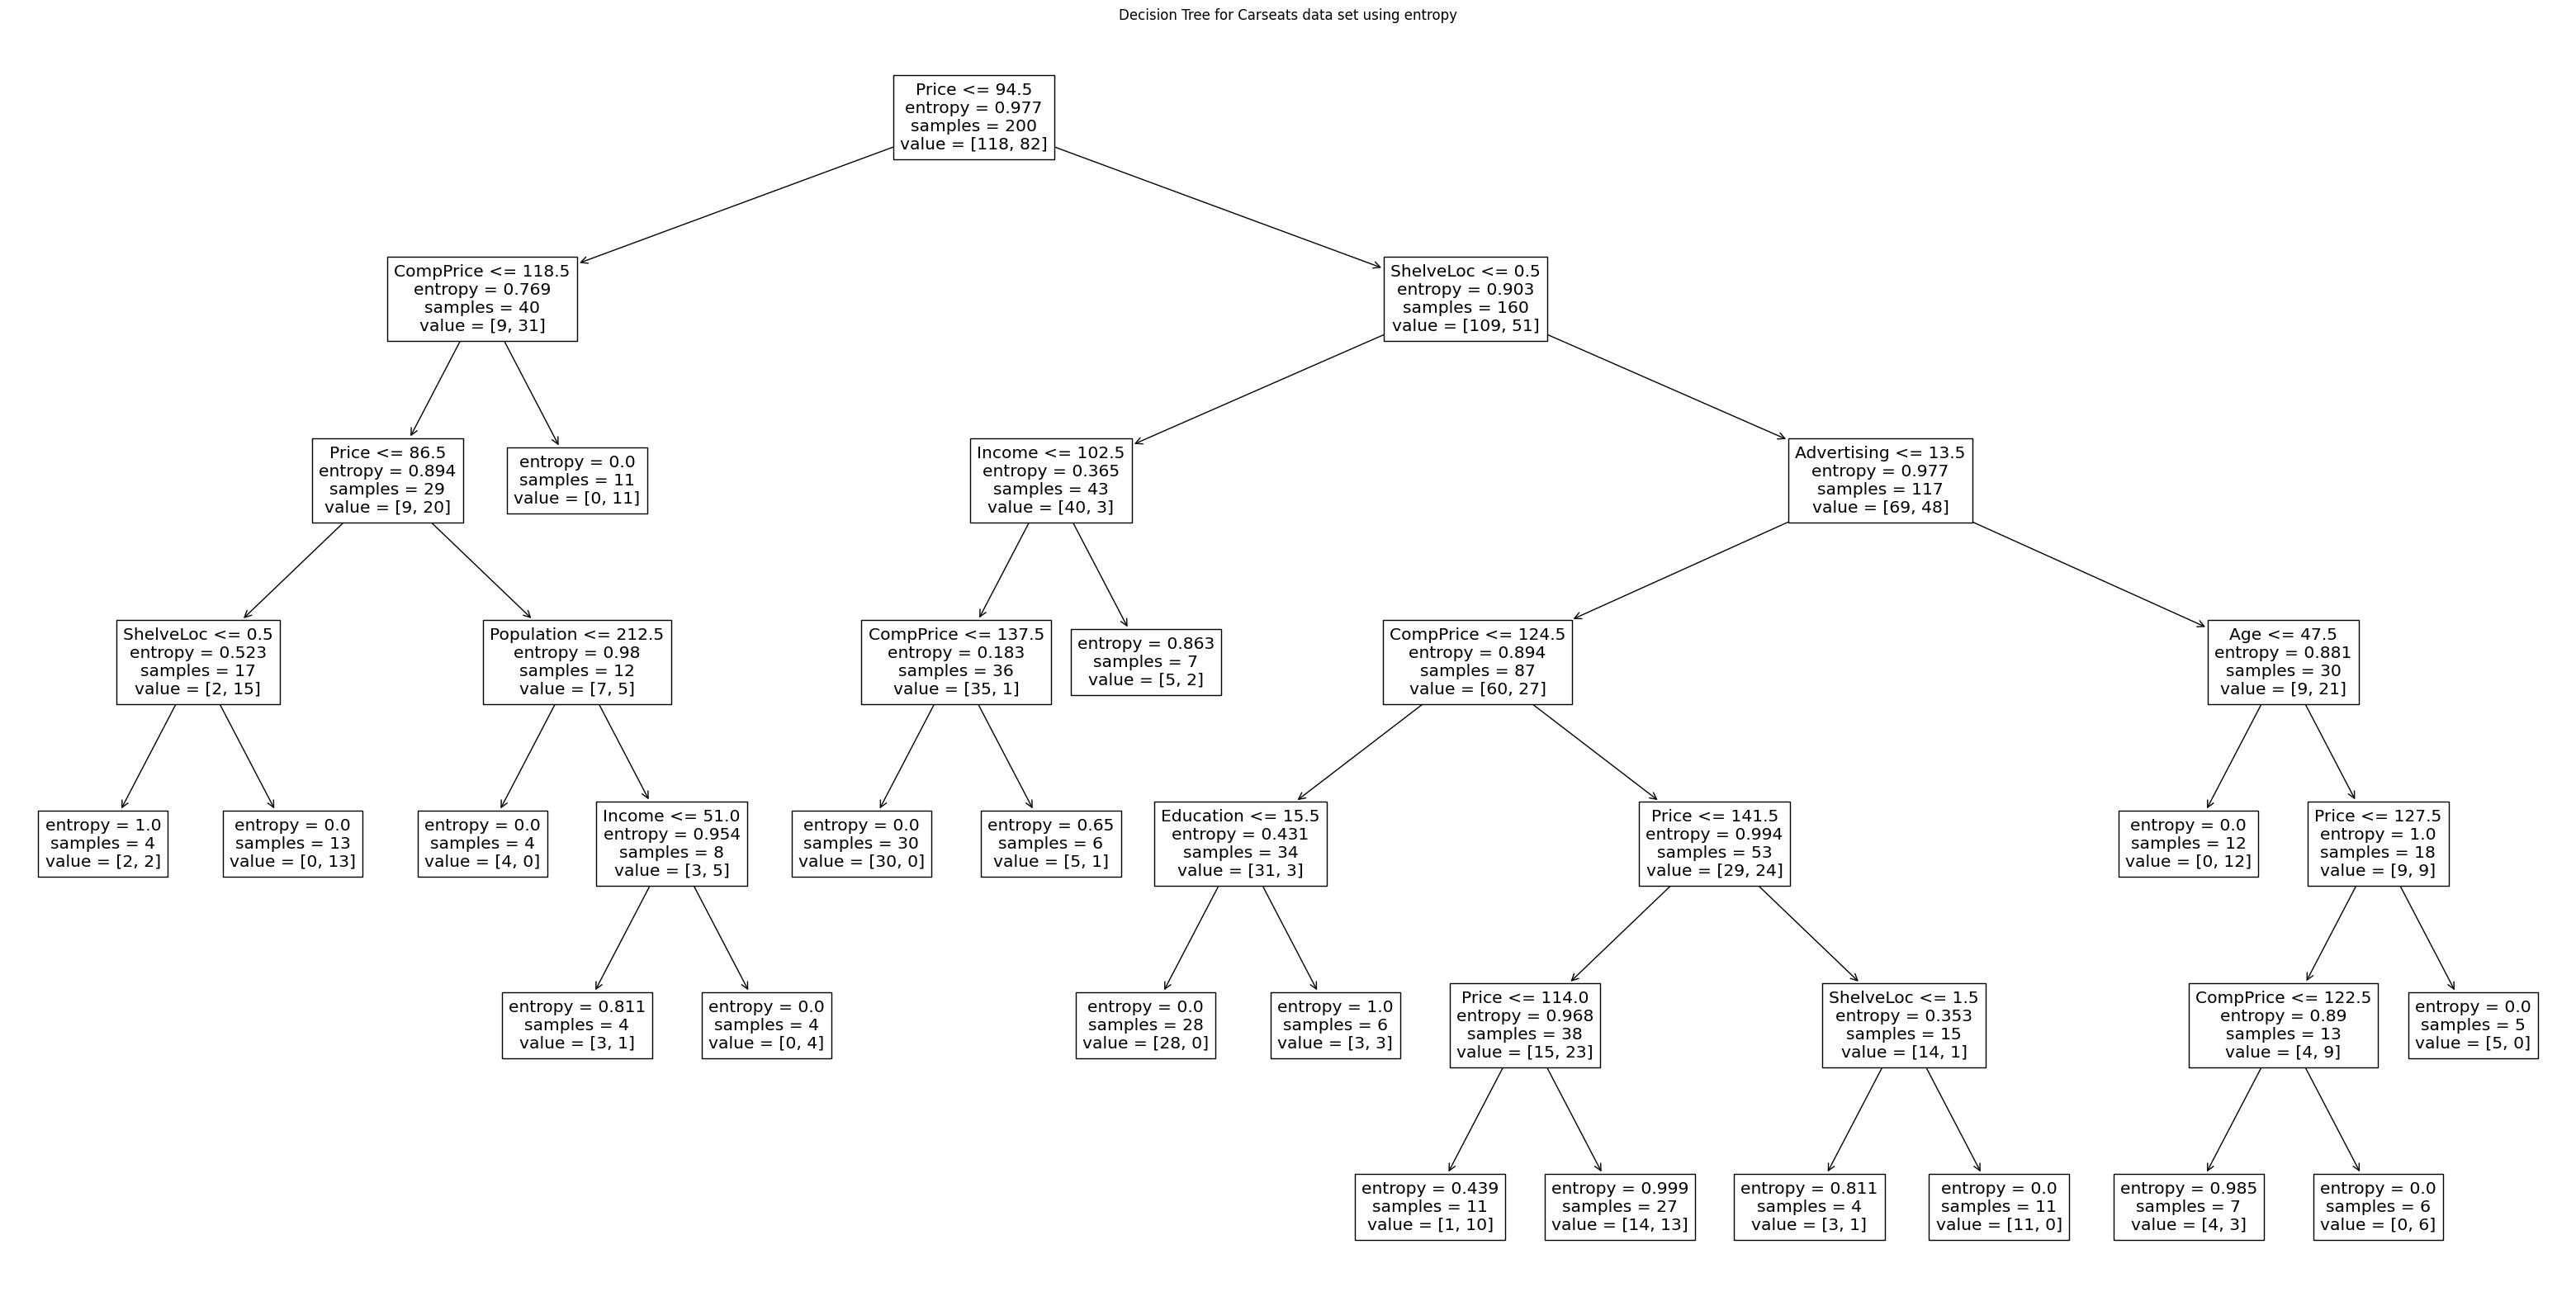

In [12]:
plt.figure(figsize=(40, 20))
plot_tree(clf_tree_entropy, feature_names=X_train.columns)
plt.title("Decision Tree for Carseats data set using entropy")
plt.show()

### We clearly see that the decision trees are quite difference for the two cost functions. Nonetheless, their score is very similar. Overall, it seems like the most important classifier, according to both models, is the price of the car seat. We consider the training and test accuracy of both models.

In [18]:
y_pred_train_gini = clf_tree_gini.predict(X_train)
conf_matrix_train_gini = pd.DataFrame(confusion_matrix(y_train, y_pred_train_gini).T, index = ['No', 'Yes'], columns=['No', 'Yes'])
print(conf_matrix_train_gini)
print("Accuracy on training data set when using Gini index is " + str(accuracy_score(y_train, y_pred_train_gini)*100) + "%")

y_pred_test_gini = clf_tree_gini.predict(X_test)
conf_matrix_test_gini = pd.DataFrame(confusion_matrix(y_test, y_pred_test_gini).T, index = ['No', 'Yes'], columns=['No', 'Yes'])
print(conf_matrix_test_gini)
print("Accuracy on testing data set when using Gini index is " + str(accuracy_score(y_test, y_pred_test_gini)*100) + "%")

      No  Yes
No   113   15
Yes    5   67
Accuracy on training data set when using Gini index is 90.0%
     No  Yes
No   99   32
Yes  19   50
Accuracy on training data set when using Gini index is 74.5%


In [20]:
y_pred_train_entropy = clf_tree_entropy.predict(X_train)
conf_matrix_train_entropy = pd.DataFrame(confusion_matrix(y_train, y_pred_train_entropy).T, index = ['No', 'Yes'], columns=['No', 'Yes'])
print(conf_matrix_train_entropy)
print("Accuracy on training data set when using entropy is " + str(accuracy_score(y_train, y_pred_train_entropy)*100) + "%")

y_pred_test_entropy = clf_tree_entropy.predict(X_test)
conf_matrix_test_entropy = pd.DataFrame(confusion_matrix(y_test, y_pred_test_entropy).T, index = ['No', 'Yes'], columns=['No', 'Yes'])
print(conf_matrix_test_entropy)
print("Accuracy on testing data set when using entropy is " + str(accuracy_score(y_test, y_pred_test_entropy)*100) + "%")

      No  Yes
No   117   26
Yes    1   56
Accuracy on training data set when using entropy is 86.5%
      No  Yes
No   108   42
Yes   10   40
Accuracy on testing data set when using entropy is 74.0%


### Both models have similar predictive power, although the one using entropy seems to be better at predicting the number of sales being low, whereas the one using the Gini index - better at predicting it to be high.
## 2. Fitting Regression Trees
### One of the attractive features of decision trees is that they can solve both classification and regression problems with little alteration. We now fit a regression tree to the $\texttt{Boston}$ data set.

In [21]:
# import the data set
Boston = pd.read_csv('Boston.csv', header=0)
print(Boston.head())
print("The shape of the data set is", Boston.shape)

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
The shape of the data set is (506, 14)


In [46]:
print(Boston.columns)
Boston.drop(columns=Boston.columns[0], inplace=True)
print(Boston.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


In [47]:
X = Boston.drop('medv', axis=1)
y = Boston.medv
train_size = 0.5 # 50-50% split
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

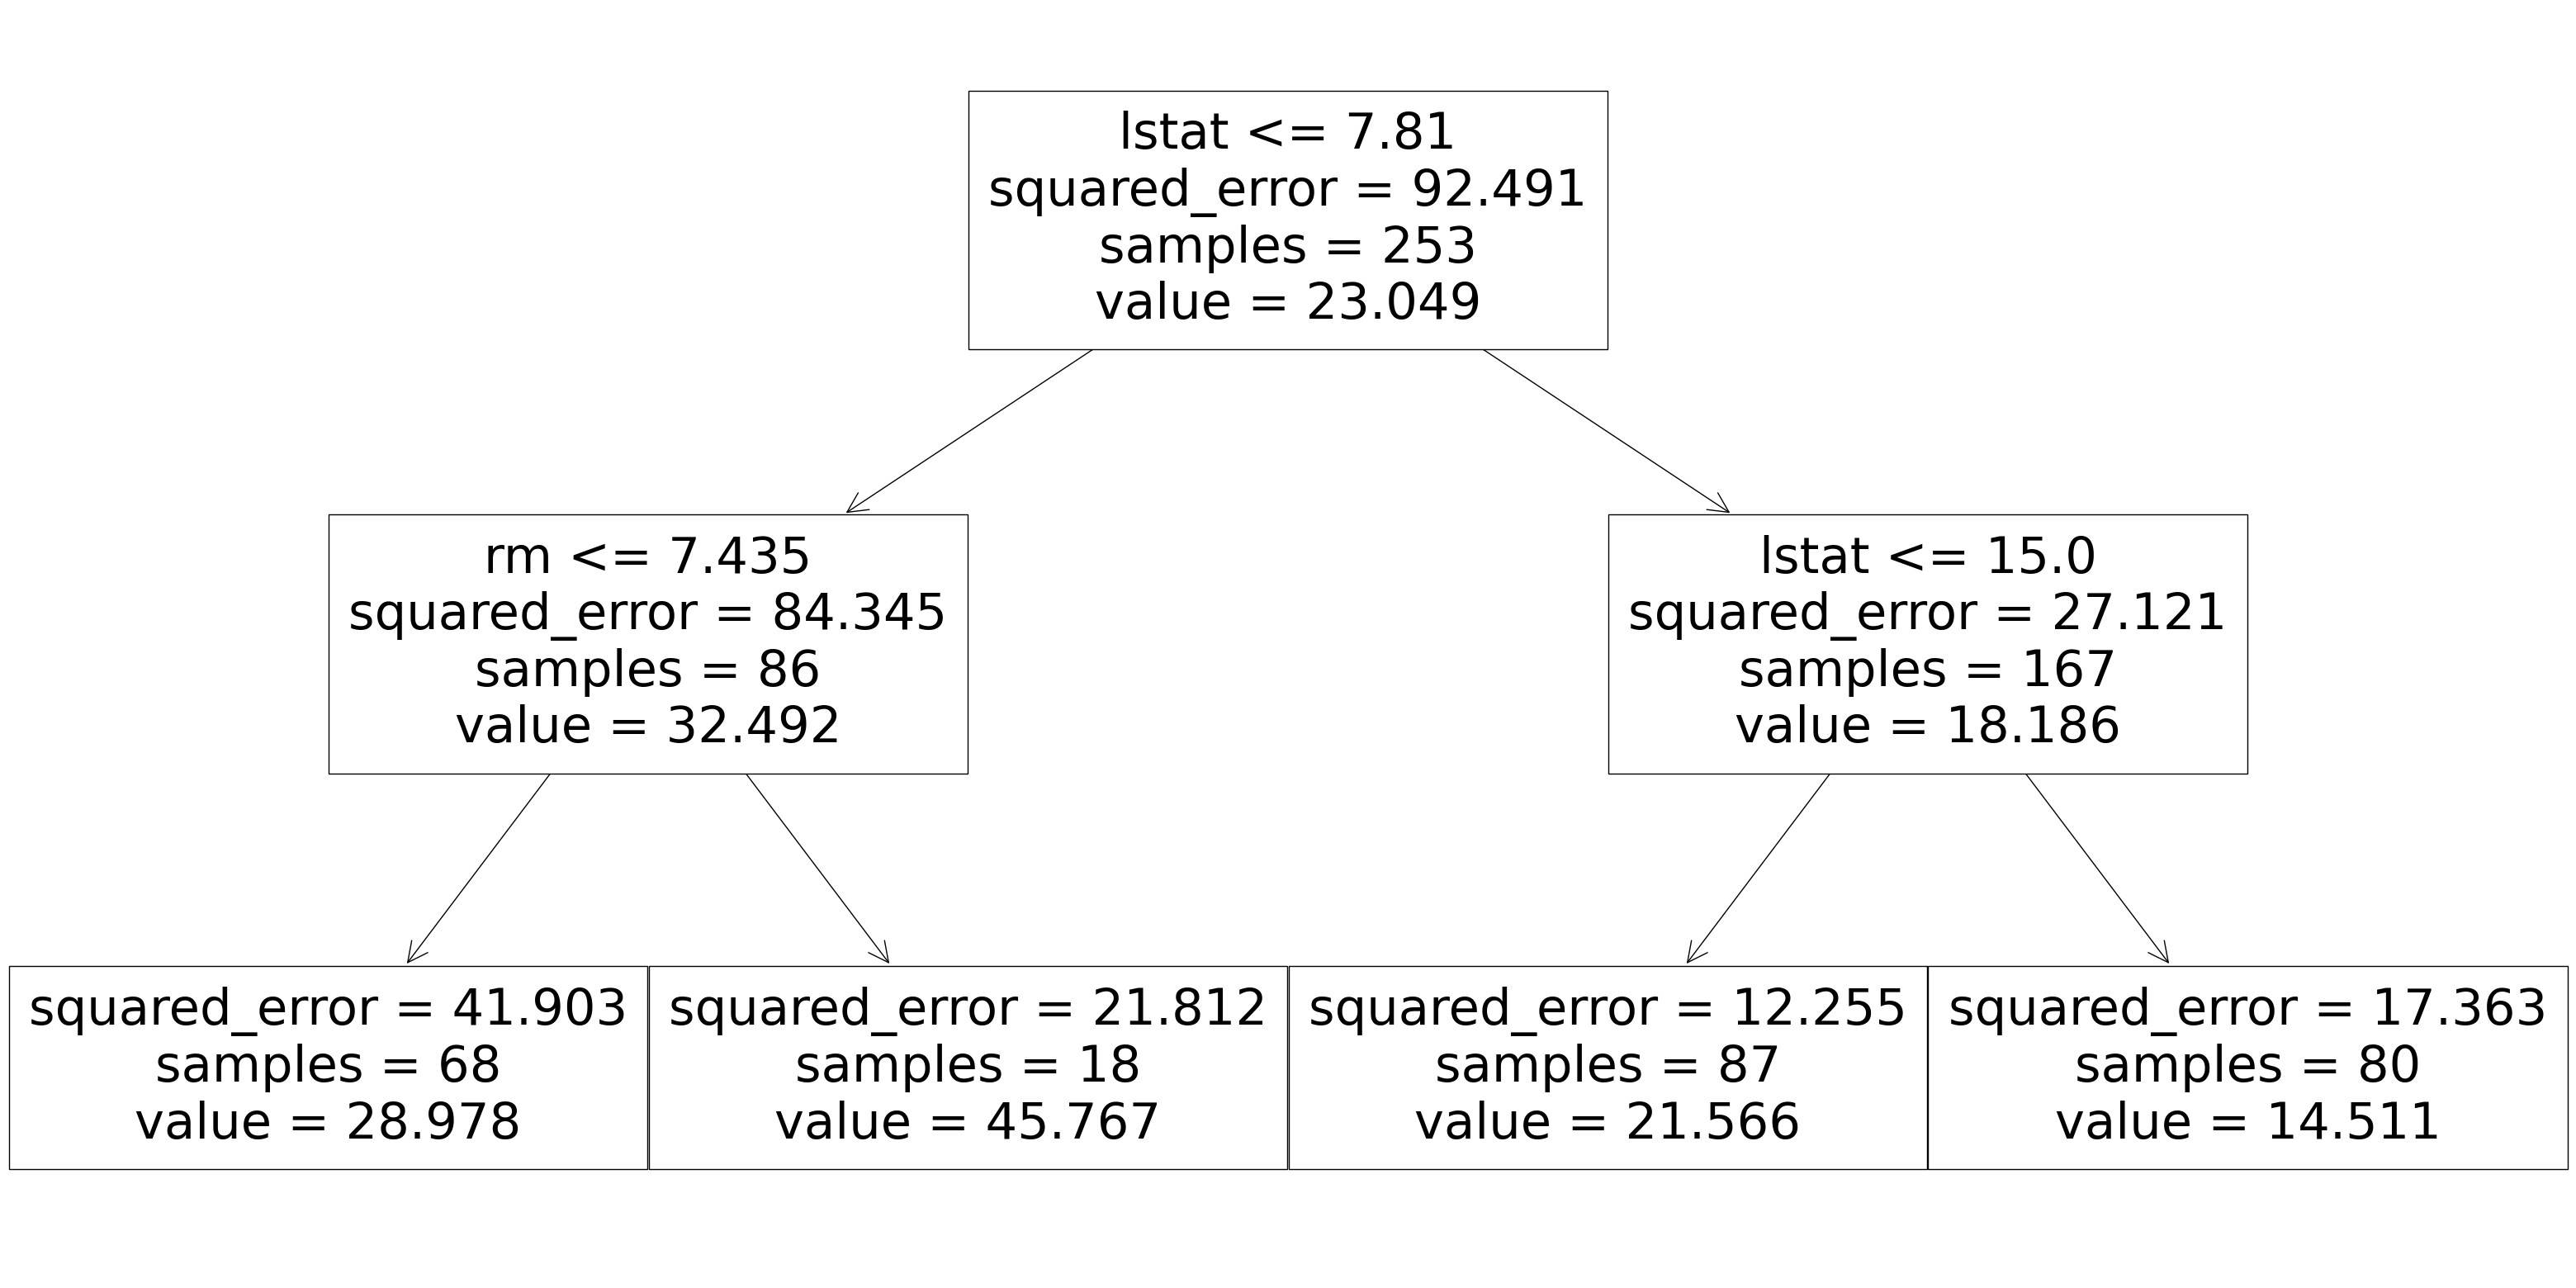

In [48]:
# fit the decision tree
max_depth = 2
regr_tree = DecisionTreeRegressor(max_depth=max_depth)
regr_tree.fit(X_train, y_train)
plt.figure(figsize=(40,20))
plot_tree(regr_tree, feature_names = X_train.columns)
plt.show()

### We see that the most import classifier is 'lstat', which measures the percentage of individuals with lower socioeconomic status, followed by 'rm', measuring the number of rooms in the house, which is intuitive. To determine the tree depth we should use we consider how the mean squared error on the test data set varies with max tree depth.

Fitting decision tree with max depth of 1
Fitting decision tree with max depth of 2
Fitting decision tree with max depth of 3
Fitting decision tree with max depth of 4
Fitting decision tree with max depth of 5
Fitting decision tree with max depth of 6
Fitting decision tree with max depth of 7
Fitting decision tree with max depth of 8
Fitting decision tree with max depth of 9
Fitting decision tree with max depth of 10
Fitting decision tree with max depth of 11
Fitting decision tree with max depth of 12
Fitting decision tree with max depth of 13
Fitting decision tree with max depth of 14
Fitting decision tree with max depth of 15
Fitting decision tree with max depth of 16
Fitting decision tree with max depth of 17


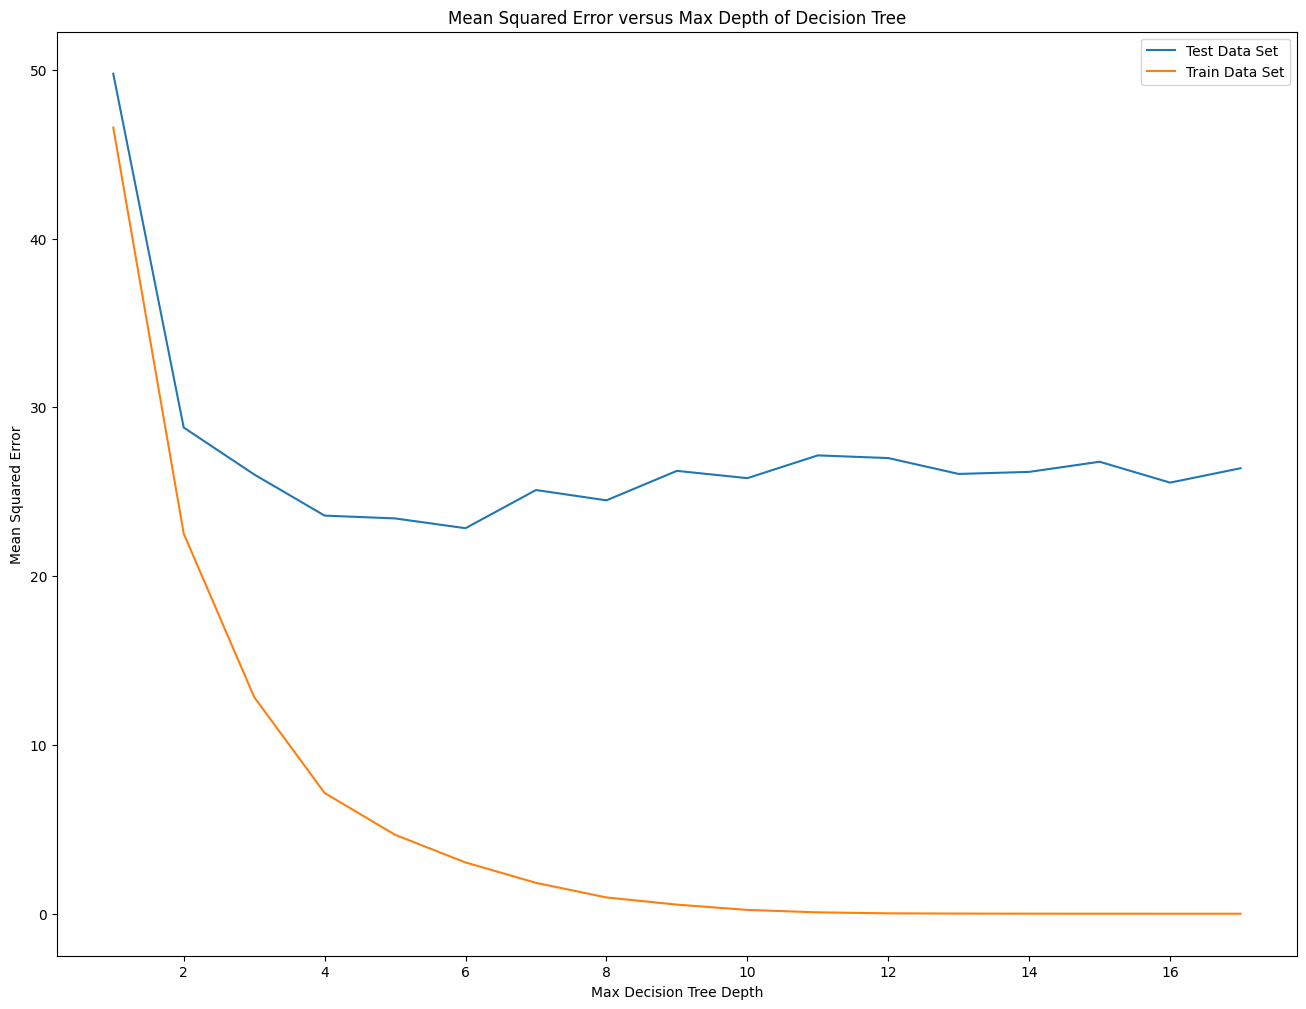

In [49]:
max_depths = np.arange(1, 18)
MSEs_test = []
MSEs_train = []
for max_depth in max_depths:
    print("Fitting decision tree with max depth of", max_depth)
    regr_tree_tmp = DecisionTreeRegressor(max_depth=max_depth)
    regr_tree_tmp.fit(X_train, y_train)
    y_pred_test = regr_tree_tmp.predict(X_test)
    y_pred_train = regr_tree_tmp.predict(X_train)
    MSEs_test.append(mean_squared_error(y_test, y_pred_test))
    MSEs_train.append(mean_squared_error(y_train, y_pred_train))
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(max_depths, MSEs_test, label="Test Data Set")
ax.plot(max_depths, MSEs_train, label="Train Data Set")
ax.set_xlabel("Max Decision Tree Depth")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Mean Squared Error versus Max Depth of Decision Tree")
ax.legend()

### It appears that the MSE for the test data is minimised for a max decision tree depth of $6$ nodes, implying that more complex trees yield no siginificant improvement. We fit a tree with this maximum depth as our final model.

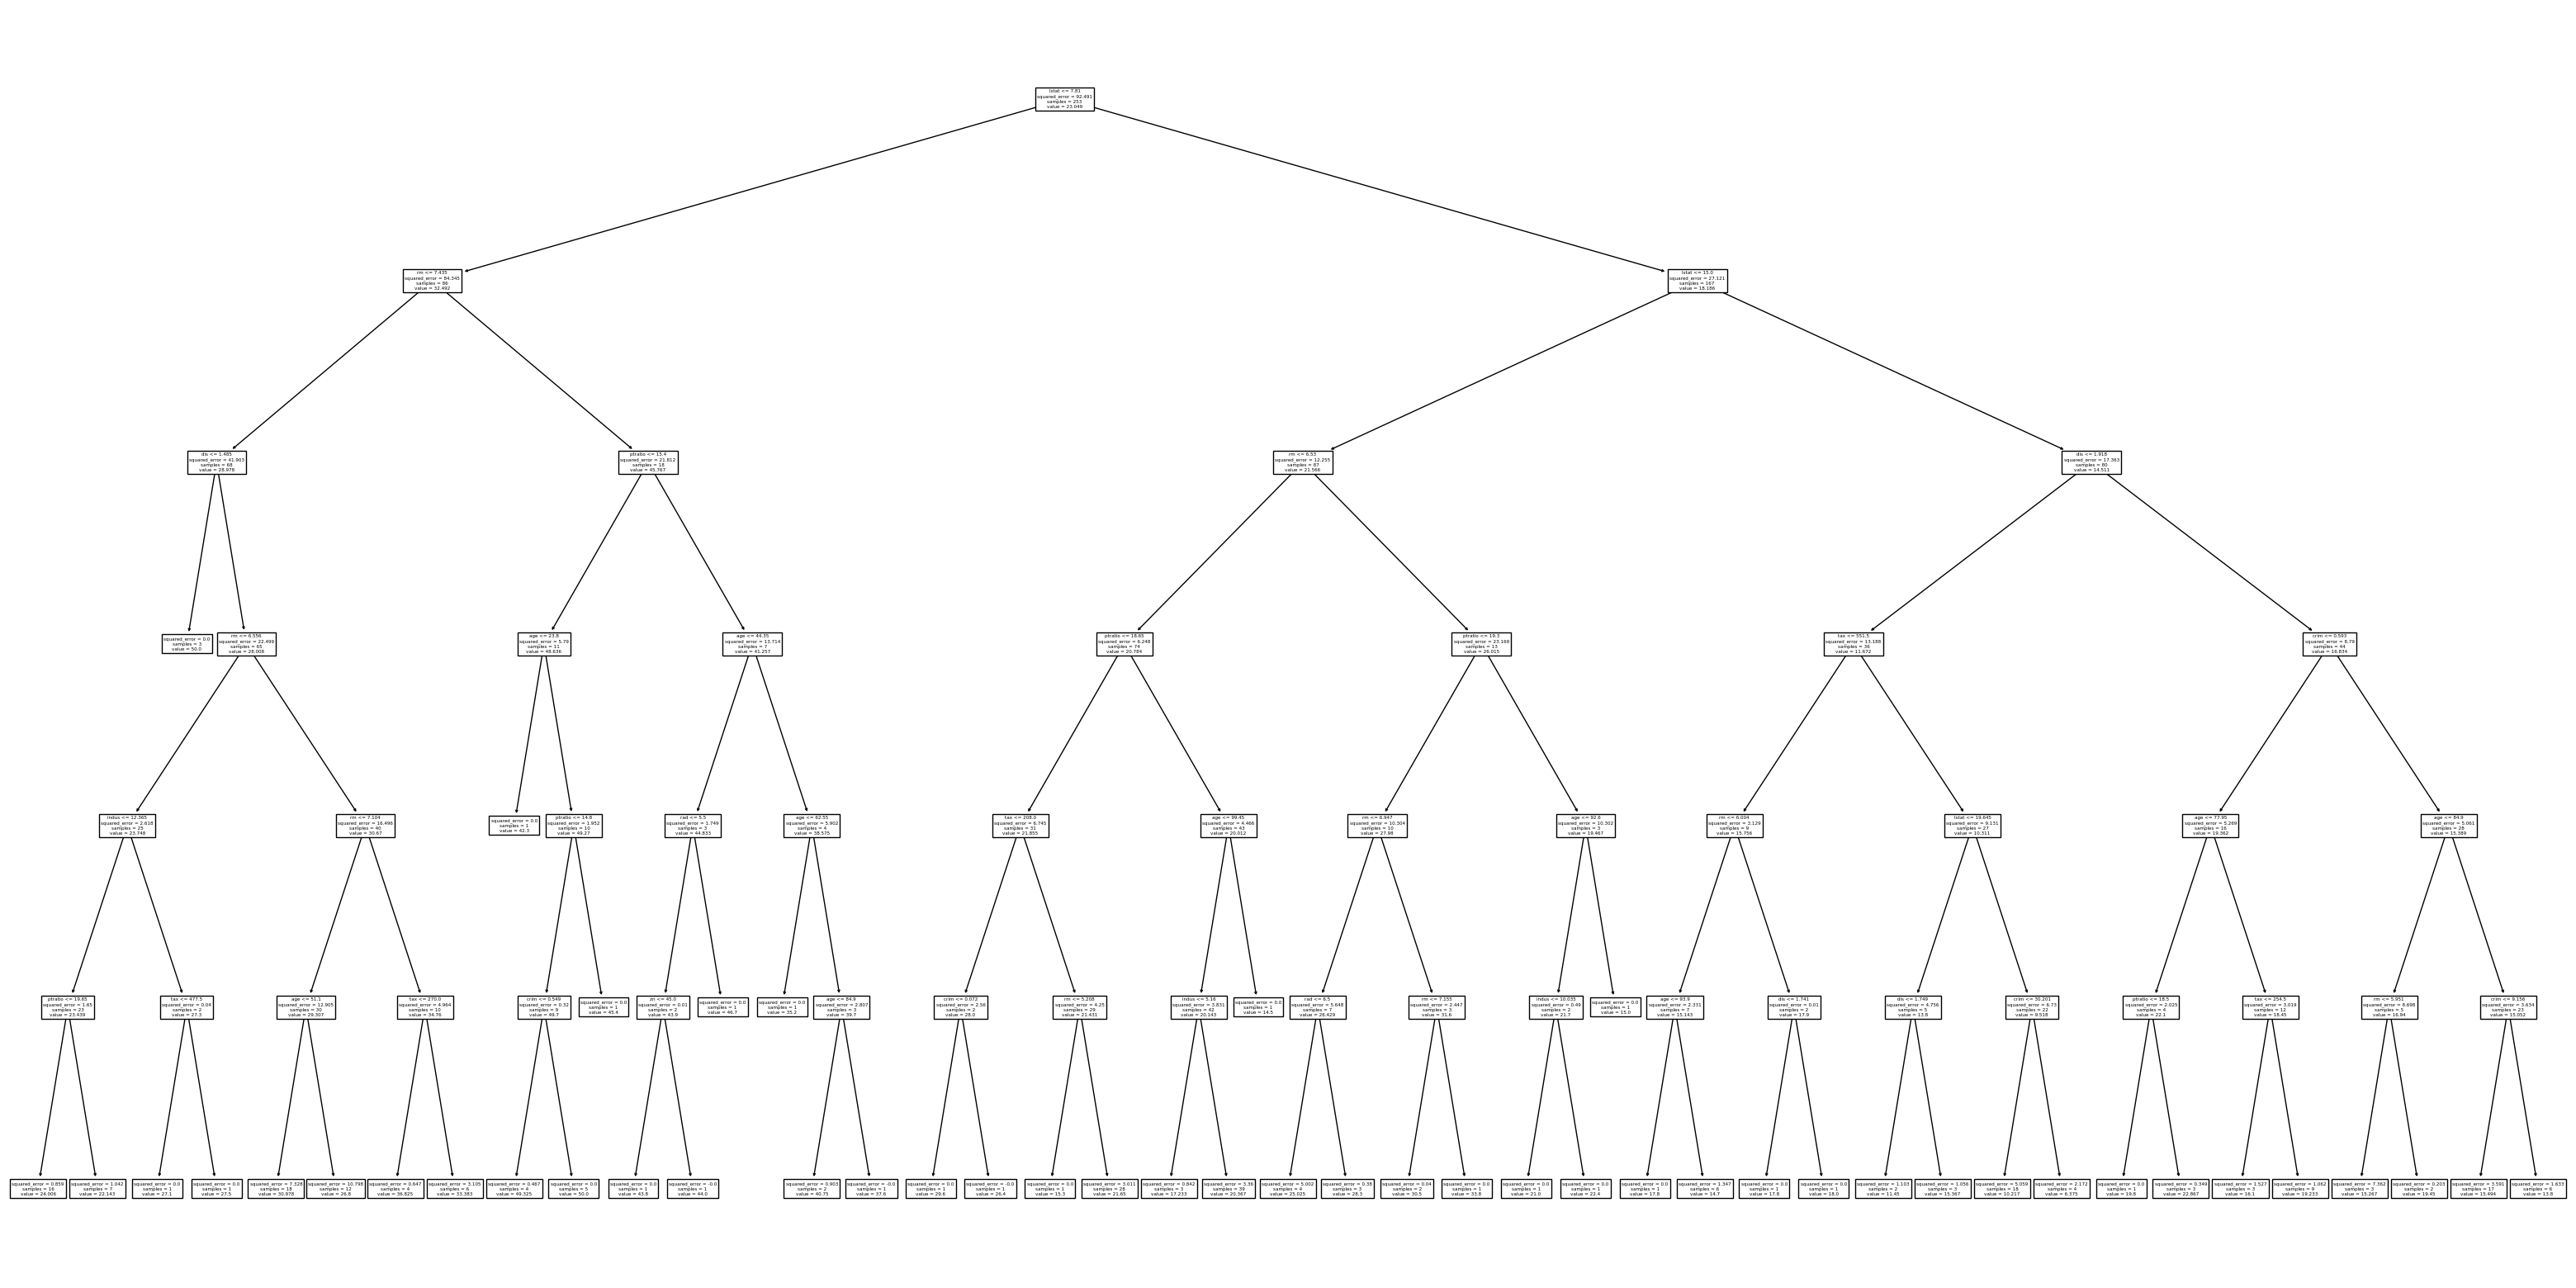

Prediction Error: 4779.0$ within true median home value for the census tract.


In [53]:
# fit the decision tree
max_depth = 6
regr_tree = DecisionTreeRegressor(max_depth=max_depth)
regr_tree.fit(X_train, y_train)
plt.figure(figsize=(40,20))
plot_tree(regr_tree, feature_names = X_train.columns)
plt.show()
print("Prediction Error: " + str(round(np.sqrt(MSEs_test[max_depth-1]), 3)*1000) + "$ within true median home value for the census tract.")

## 3. Bagging and Random Forests
### We now consider ensemble methods which be definition combine many simple models to make an overall prediction which is supposedly better. Bagging and random forests use bootstraping to train multiple decision trees on different data sets generated randomly from the original data set with repetition. This will generally lead to a decrease in variance compared to a single decision tree model, i.e., prevent over-fitting. The difference between these two ensemble methods is that random forests consider only a random subset of all predictors when determining the classifier at a given tree node.

In [54]:
# bagging ensemble
all_features_no = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features_no, random_state=1)
regr_bagging.fit(X_train, y_train)
y_pred_bagging_test = regr_bagging.predict(X_test)
print("Prediction Error (Bagging): " + str(round(np.sqrt(mean_squared_error(y_test, y_pred_bagging_test)), 3)*1000) + "$ within true median home value for the census tract.")

Prediction Error (Bagging): 4043.9999999999995$ within true median home value for the census tract.


In [55]:
# random forest ensemble
rf_features_no = int(np.sqrt(all_features_no)) # as a rule of thumb use square root of total number of features in random forests
regr_rf = RandomForestRegressor(max_features=rf_features_no, random_state=1)
regr_rf.fit(X_train, y_train)
y_pred_rf_test = regr_rf.predict(X_test)
print("Prediction Error (Random Forest): " + str(round(np.sqrt(mean_squared_error(y_test, y_pred_rf_test)), 3)*1000) + "$ within true median home value for the census tract.")

Prediction Error (Random Forest): 3925.0$ within true median home value for the census tract.


### We see a clear reduction in the prediction error when using the more complex ensemble methods. The random forest seems to work better because the constraint on the number of predictors causes the decision trees to be less correlated, which increases the overall decrease in variance.
### Unfortunately, these more complex methods cannot be interpreted as easily visually. However, we can still determine which features are most important for the ensemble of decision trees.

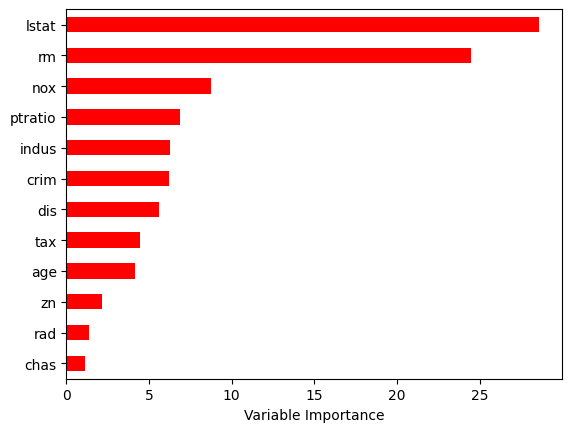

In [56]:
Importance = pd.DataFrame({'Importance':regr_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### As expected, the most important predictors are by far 'lstat' and 'rm'.
## 4. Boosting
### Another ensemble method is that of boosted decision trees. Here we train multiple decision trees, with the current tree being fitted to the residuals of the previous tree. Effectively, we iteratively improve the model by training it to distinguish the samples which the previous models were bad at. This approach has three parameters:
 - ### the number of iterations (a large number can lead to overfitting);
 - ### the shrinkage parameter which determines what "proportion" of the most recently fitted tree is added to the overall model. Effectively, this determines the learning speed of the model and small values of this parameter require many iterations to reach a good model. However, it is generally true that slow-learning models are usually the best;
 - ### the comlexity of the tree trained at each iteration. A single classifier, also called a stump, is usually sufficient to reach good performance.
### We will fix the learning parameter at the typical value of $0.01$, and use the test MSE to determine the appropriate values of the other two parameters.

In [62]:
max_depths = np.arange(1, 7)
max_iterations = 2000
no_iterations = np.arange(200, max_iterations+200, 200)
MSEs_test_per_depth = []
MSEs_train_per_depth = []

for max_depth in max_depths:
    print("Training Boosted Decision Trees with max depth of", max_depth)
    MSEs_test_tmp = []
    MSEs_train_tmp = []
    for n_estimators in no_iterations:
        print("Iterations:", n_estimators)
        regr_boosted_tmp = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=0.01, max_depth=max_depth, random_state=1)
        regr_boosted_tmp.fit(X_train, y_train)
        y_pred_test_tmp = regr_boosted_tmp.predict(X_test)
        y_pred_train_tmp = regr_boosted_tmp.predict(X_train)
        MSEs_test_tmp.append(mean_squared_error(y_test, y_pred_test_tmp))
        MSEs_train_tmp.append(mean_squared_error(y_train, y_pred_train_tmp))
    MSEs_test_per_depth.append(MSEs_test_tmp)
    MSEs_train_per_depth.append(MSEs_train_tmp)
    print('\n')


Training Boosted Decision Trees with max depth of 1
Iterations: 200
Iterations: 400
Iterations: 600
Iterations: 800
Iterations: 1000
Iterations: 1200
Iterations: 1400
Iterations: 1600
Iterations: 1800
Iterations: 2000


Training Boosted Decision Trees with max depth of 2
Iterations: 200
Iterations: 400
Iterations: 600
Iterations: 800
Iterations: 1000
Iterations: 1200
Iterations: 1400
Iterations: 1600
Iterations: 1800
Iterations: 2000


Training Boosted Decision Trees with max depth of 3
Iterations: 200
Iterations: 400
Iterations: 600
Iterations: 800
Iterations: 1000
Iterations: 1200
Iterations: 1400
Iterations: 1600
Iterations: 1800
Iterations: 2000


Training Boosted Decision Trees with max depth of 4
Iterations: 200
Iterations: 400
Iterations: 600
Iterations: 800
Iterations: 1000
Iterations: 1200
Iterations: 1400
Iterations: 1600
Iterations: 1800
Iterations: 2000


Training Boosted Decision Trees with max depth of 5
Iterations: 200
Iterations: 400
Iterations: 600
Iterations: 800
Iter

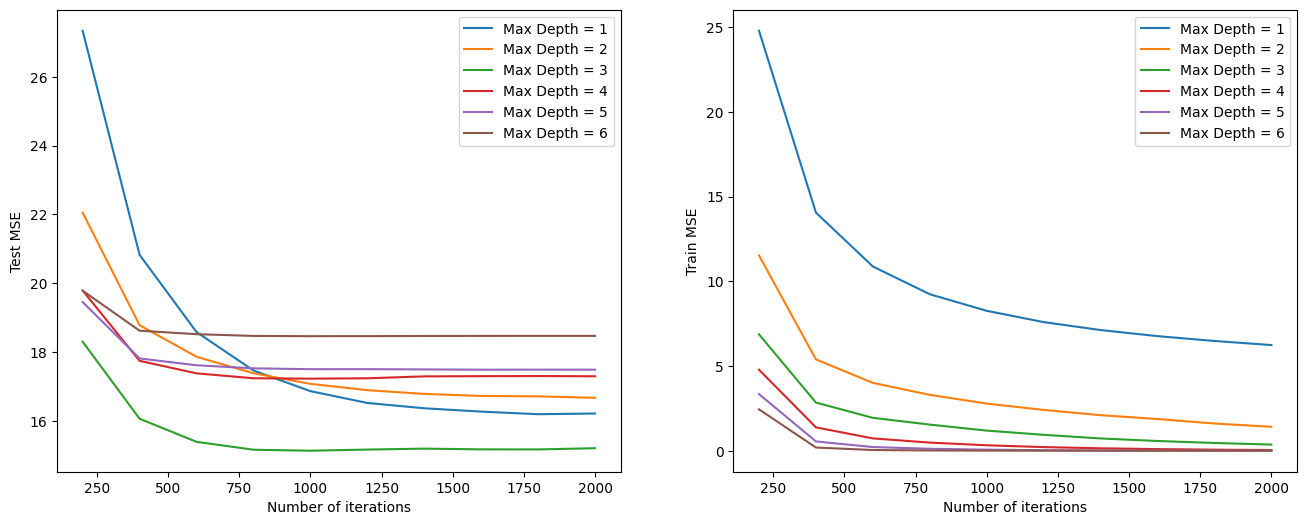

In [63]:
fig_boost, (ax_boost_test, ax_boost_train) = plt.subplots(1, 2, figsize=(16,6))
for max_depth in max_depths:
    ax_boost_test.plot(no_iterations, MSEs_test_per_depth[max_depth-1], label="Max Depth = " + str(max_depth))
    ax_boost_train.plot(no_iterations, MSEs_train_per_depth[max_depth-1], label="Max Depth = " + str(max_depth))
ax_boost_train.set_xlabel("Number of iterations")
ax_boost_train.set_ylabel("Train MSE")
ax_boost_test.set_xlabel("Number of iterations")
ax_boost_test.set_ylabel("Test MSE")
ax_boost_test.legend()
ax_boost_train.legend()

### From the plots above we can conclude that a max depth of $3$ nodes is optimal and training should stop after $1000$ iterations as no significant improvement is visible after.

In [64]:
n_estimators = 1000
learning_rate = 0.01
max_depth = 3
regr_boosted = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
regr_boosted.fit(X_train, y_train)
y_pred_boosed_test = regr_boosted.predict(X_test)
print("Prediction Error (Boosted Decision Tree): " + str(round(np.sqrt(mean_squared_error(y_test, y_pred_boosed_test)), 3)*1000) + "$ within true median home value for the census tract.")

Prediction Error (Boosted Decision Tree): 3890.0$ within true median home value for the census tract.


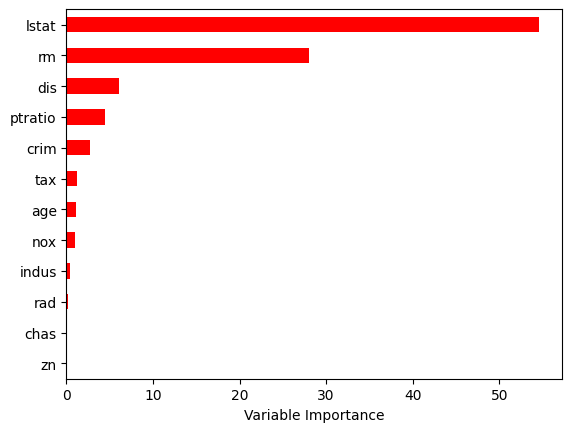

In [66]:
# let us check the feature importance and MSE.
feature_importance = regr_boosted.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Overall, the boosted decision tree has the lowest MSE on the test data set from all ensemble methods. Nonetheless, all models seem to agree that the most important predictors are 'lstat' and 'rm'.